# Lab 1.4: Introduction to Linear Regression [GRADED]

Linear regression is an approach to modeling the relationship between a continuous dependent variable (**y**) and 
one or more independent variables (**x**). Here you will be introduced to fitting the model and interpreting the results before we dive more into the details of linear regression later in the course.

1. We will be using the `prestige` data in `statsmodels`. `statsmodels` is the de facto library for performing regression
   tasks in Python. Load the data with the follow code. **Remember to add a column of `1` to the x matrix for the 
   model to fit an intercept**.

   ```python 
   import statsmodels.api as sm
   prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
   y = prestige['prestige']
   X = prestige[['income', 'education']].astype(float)
   ```

2. Explore the data by making a [scatter_matrix](http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter-matrix)
   and a [boxplot](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)
   to show the range of each of your variables.
   
3. The beta coefficients of a linear regression model can be calculated by solving the normal equation.
   Using numpy, write a function that solves the **normal equation** (below).
   As input your function should take a matrix of features (**x**) and
   a vector of target (**y**). You should return a vector of beta coefficients 
   that represent the line of best fit which minimizes the residual. 
   
    $$ \hat{\beta} = (X^TX)^{-1}X^Ty$$

4. Verify your results using statsmodels. Use the code below as a reference.
   ```python
   import statsmodels.api as sm
   model = sms.OLS(y, X).fit()
   summary = model.summary()
   ```

5. Interpret your result summary, focusing on the beta coefficents and the $R^2$. 


In [12]:
import statsmodels.api as sm
prestige = sm.datasets.get_rdataset("Duncan", "car", cache=True).data
y = prestige['prestige']
X = prestige[['income', 'education']].astype(float)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11e8cbef0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11e9d8a90>]], dtype=object)

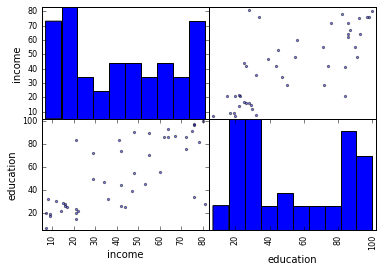

In [13]:
# http://pandas.pydata.org/pandas-docs/version/0.15.0/visualization.html#visualization-scatter-matrix.
%pylab inline
from pandas.tools.plotting import scatter_matrix
scatter_matrix(X)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11f32fb00>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11f788940>]], dtype=object)

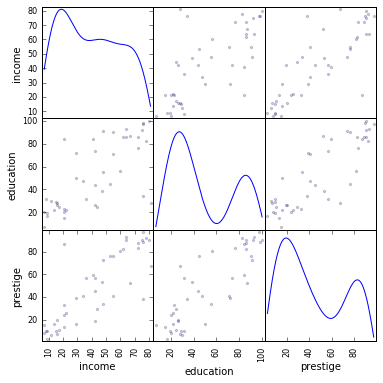

In [17]:
scatter_matrix(prestige, alpha=0.2, figsize=(6, 6), diagonal='kde')

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


{'boxes': [<matplotlib.lines.Line2D at 0x12025c860>,
 'caps': [<matplotlib.lines.Line2D at 0x120263be0>,
 'fliers': [<matplotlib.lines.Line2D at 0x12026fba8>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x12026ac50>,
 'whiskers': [<matplotlib.lines.Line2D at 0x12025ca20>,
  <matplotlib.lines.Line2D at 0x12028cd68>]}

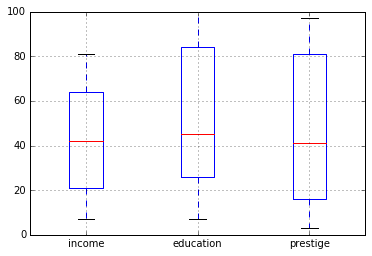

In [18]:
# http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html
prestige.boxplot()

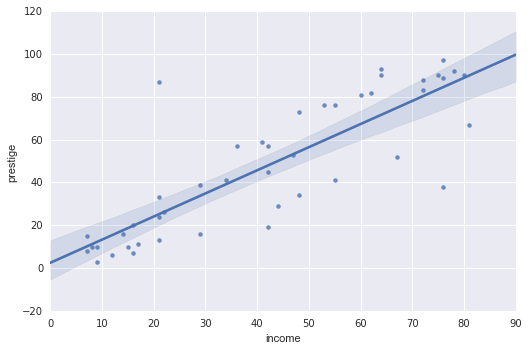

In [35]:
import seaborn as sns
sns.lmplot('income', 'prestige', data=prestige, aspect=1.5)

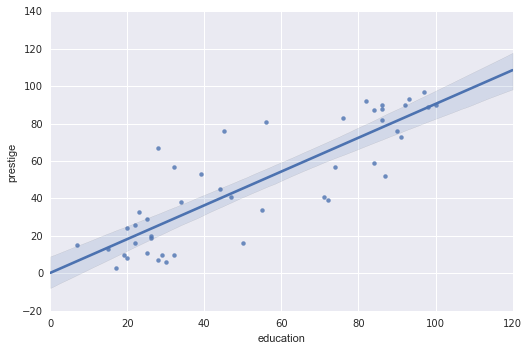

In [36]:
import seaborn as sns
sns.lmplot('education', 'prestige', data=prestige, aspect=1.5)

In [19]:
X = sm.add_constant(X)
X.head()

,const,income,education
accountant,1,62.0,86.0
pilot,1,72.0,76.0
architect,1,75.0,92.0
author,1,55.0,90.0
chemist,1,64.0,86.0


In [31]:
import numpy as np

def beta_coefficients(features, target):
    
    np.asarray(features)
    np.asarray(target)
    
    features_transpose = features.T
    
    result = np.linalg.inv(features_transpose.dot(features)).dot(features_transpose).dot(target)
    
    return result

In [32]:
beta_coefficients(X, y)

array([-6.06466292,  0.59873282,  0.54583391])

In [22]:
import statsmodels.api as sm

model = sm.OLS(y, X).fit()
summary = model.summary()
summary

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               prestige   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     101.2
Date:                Fri, 02 Sep 2016   Prob (F-statistic):           8.65e-17
Time:                        15:16:18   Log-Likelihood:                -178.98
No. Observations:                  45   AIC:                             364.0
Df Residuals:                      42   BIC:                             369.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.0647      4.272     -1.420      0.163       -14.686     2.556
income         0.5987      0.120      5.003      0.000         0.357     0.840
education      0.5458      0.098      5.555      0.000         0.348     0.744
==============================================================================
Omnibus:                        1.279   Durbin-Watson:                   1.458
Prob(Omnibus):                  0.528   Jarque-Bera (JB):                0.520
Skew:                           0.155   Prob(JB):                        0.771
Kurtosis:                       3.426   Cond. No.                         163.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The percentage of the variation in y (prestige) can be explained by the corresponding variation in X (education and income) and the least-squares line is 82.8%, and the unexplained percentage of variation is 100% – 82.8% = 17.2%.

Every unit of increase in income affects prestige by 0.5987, and every unit of increase in education affecrs prestige by 0.5458.

So income has a slightly more impact (0.5987) on prestige than education (0.5458).
